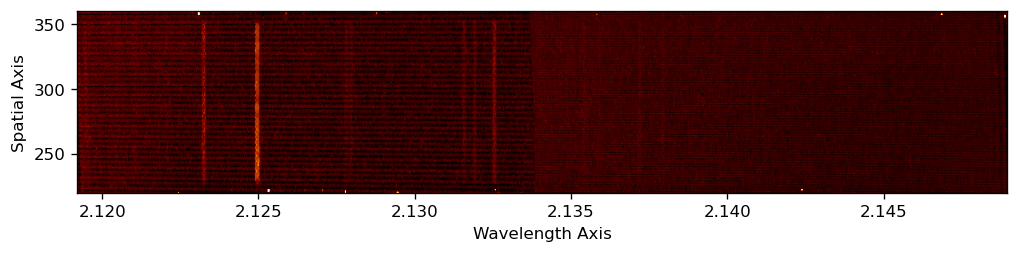

In [2]:
# import packages
from matplotlib import rcParams
rcParams['figure.dpi'] = 120
rcParams["savefig.dpi"] = 200
rcParams['figure.facecolor'] = 'w'

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from lmfit import Model
from lmfit.models import PolynomialModel, QuadraticModel, LinearModel, ConstantModel
from lmfit import minimize, Parameters, fit_report

import os
import warnings
warnings.filterwarnings('ignore')

# path joining version for other paths
notebook_path = os.path.abspath('/Users/RuoyanWang/Documents/LEICESTER/h3p/code/')
filepath = os.path.join(os.path.dirname(notebook_path), '02jun17/spec/')

# count number of fits files in folder
filesize = len([name for name in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, name))])


# define normalization function
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# define guassian function, credit to pen and pants IDL's Gaussfit in Python
def gaussian_fit(x, a0, a1, a2, a3, a4, a5): 
    """
    x = data array
    a0 = height of guassian
    a1 = pixel position of Gaussian peak
    a2 = width of Gaussian
    a3 = constant term
    a4 = linear term
    a5 = quadratic term
    
    note: fwhm = a2 * np.sqrt(2 * np.log(2)) * 2
    """
    z = (x - a1) / a2
    y = a0 * np.exp(-z**2 / a2) + a3 + a4 * x + a5 * x**2
    return y

# load waverange
waverange = fits.open(filepath + 'order36/waverange.fits', ignore_missing_end=True)[0].data

# load skylines
skylines = fits.open(filepath + 'order36/skylines60m_order36.fits', ignore_missing_end=True)[0].data
skylines60p = fits.open(filepath + 'order36/skylines60p_order36.fits', ignore_missing_end=True)[0].data
skylines_shifted = fits.open(filepath + 'order36/skylines_shifted_order36.fits', ignore_missing_end=True)[0].data

spat_lower = 220
spat_upper = 360

plt.figure(figsize=(10,2))
# plt.imshow(skylines, cmap='gist_gray')
plt.imshow(skylines, aspect='auto', extent=[waverange[0], waverange[-1], spat_upper, spat_lower], cmap='afmhot')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.gca().invert_yaxis()

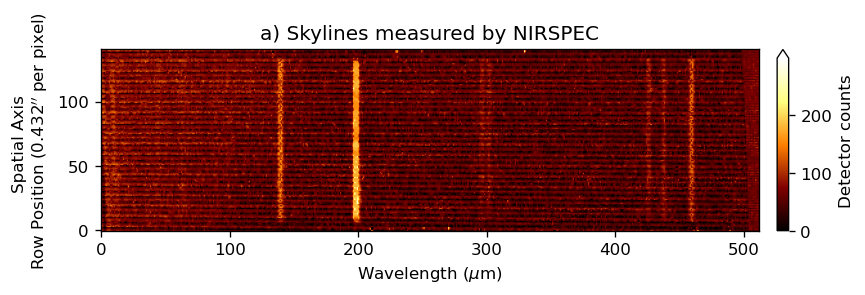

In [3]:
a = np.delete(skylines, np.s_[512:], 1)
a[a>350]=0
# pixel = np.linspace(0, np.size(c, 1), np.size(c, 1))
plt.figure(figsize=(10,2))
plt.imshow(a, cmap='afmhot')
# plt.imshow(a, aspect='auto', extent=[waverange[0], waverange[511], 364, 225], cmap='afmhot')
plt.xlabel(r'Wavelength ($\mu$m)')
plt.ylabel('Spatial Axis \nRow Position (0.432$^{\prime\prime}$ per pixel)')
plt.title('a) Skylines measured by NIRSPEC')
plt.gca().invert_yaxis()
plt.colorbar(extend='max', aspect=15, pad=0.02, label='Detector counts')

2.1232420081711174
2.124959996615822
2.1325969957673254


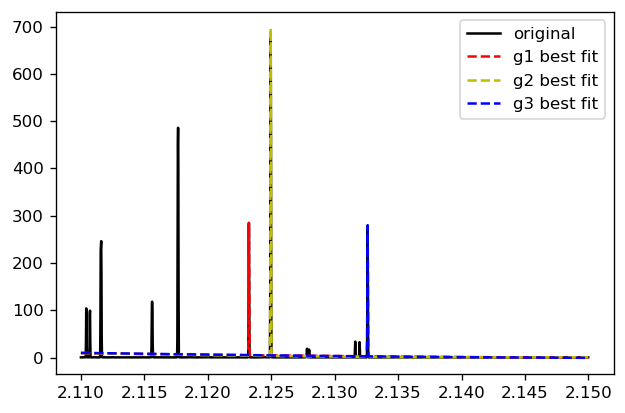

In [4]:
gemini_df = pd.read_csv('mk_skybg_zm_10_10_ph.dat', sep='\s+', header=None)
gemini_array = gemini_df.to_numpy()

wavelength = (gemini_array[60500:62500,0]/1000)#[gemini_array[60500:62500,1]>0.5]
count = gemini_array[60500:62500,1]#[gemini_array[60500:62500,1]>0.5]

plt.figure()
plt.plot(wavelength, count, 'k', label='original')
# plt.xlim(min(wavelength), max(wavelength))

# create lmfit model with defined gaussian
g1_model = Model(gaussian_fit)

# create parameters and add initial guess
g1_params = g1_model.make_params()
g1_params.add('a0', value=290)
g1_params.add('a1', value=2.12325)
g1_params.add('a2', value=0.003)
g1_params.add('a3', value=0)
g1_params.add('a4', value=0)
g1_params.add('a5', value=0)

try:
    g1_result = g1_model.fit(count, g1_params, x=wavelength)
except:
    pass

#print(g1_result.fit_report())

plt.plot(wavelength, g1_result.best_fit, 'r--', label='g1 best fit')
#plt.xlim(2.123,2.1235)

print(g1_result.params['a1'].value)

# create lmfit model with defined gaussian
g2_model = Model(gaussian_fit)
#print('parameter names: {}'.format(g2model.param_names))
#print('independent variables: {}'.format(g2model.independent_vars))


# create parameters and add initial guess
g2_params = g2_model.make_params()
g2_params.add('a0', value=692)
g2_params.add('a1', value=2.125)
g2_params.add('a2', value=0.004)
g2_params.add('a3', value=0)
g2_params.add('a4', value=0)
g2_params.add('a5', value=0)

try:
    g2_result = g2_model.fit(count, g2_params, x=wavelength)
except:
    pass

#print(g2_result.fit_report())

plt.plot(wavelength, g2_result.best_fit, 'y--', label='g2 best fit')
#plt.xlim(2.1246,2.1252)

print(g2_result.params['a1'].value)

# create lmfit model with defined gaussian
g3_model = Model(gaussian_fit)

# create parameters and add initial guess
g3_params = g3_model.make_params()
g3_params.add('a0', value=290)
g3_params.add('a1', value=2.1326)
g3_params.add('a2', value=0.003)
g3_params.add('a3', value=0)
g3_params.add('a4', value=0)
g3_params.add('a5', value=0)

try:
    g3_result = g3_model.fit(count, g3_params, x=wavelength)
except:
    pass

#print(g3_result.fit_report())

plt.plot(wavelength, g3_result.best_fit, 'b--', label='g3 best fit')
plt.legend()
#plt.xlim(2.1315,2.133)

print(g3_result.params['a1'].value)

Text(0, 0.5, 'CCD Counts')

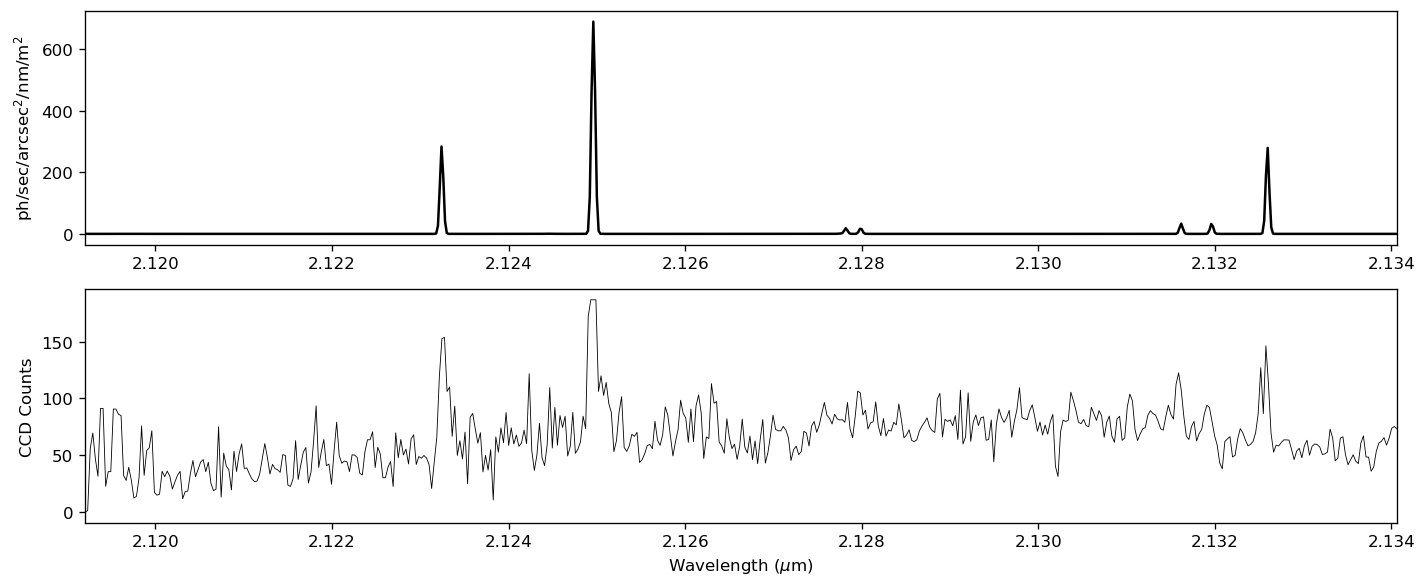

In [22]:
fig = plt.figure(figsize=(12,5), tight_layout=True)

fig.add_subplot(211)
plt.plot(wavelength, count, 'k', label='original')
# plt.plot(wavelength, g1_result.best_fit, 'r--', label='g1 best fit')
# plt.plot(wavelength, g2_result.best_fit, 'y--', label='g2 best fit')
# plt.plot(wavelength, g3_result.best_fit, 'b--', label='g3 best fit')
plt.xlim(waverange[0], waverange[511])
plt.ylabel('$\mathrm{ph/sec/arcsec^2/nm/m^2}$')
# plt.legend()

fig.add_subplot(212)
plt.plot(waverange[:512], a[50], 'k-', lw=0.5)
plt.xlim(waverange[0], waverange[511])
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('CCD Counts')

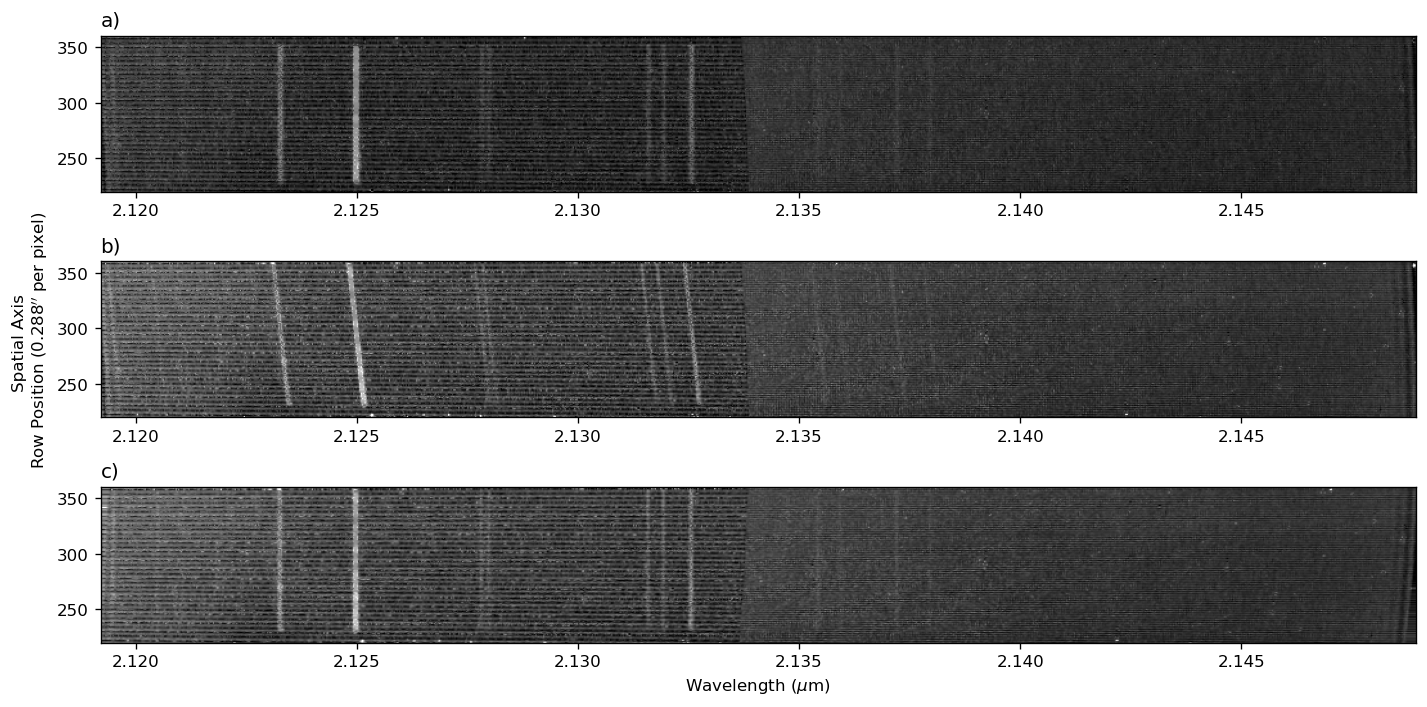

In [50]:
fig = plt.figure(figsize=(12,6), tight_layout=True)

tt = skylines
tt[tt>300]=0
fig.add_subplot(311)
plt.imshow(tt, aspect='auto', extent=[waverange[0], waverange[-1], spat_upper, spat_lower], cmap='gist_gray')
# plt.plot(wavelength, g1_result.best_fit, 'r--', label='g1 best fit')
# plt.plot(wavelength, g2_result.best_fit, 'y--', label='g2 best fit')
# plt.plot(wavelength, g3_result.best_fit, 'b--', label='g3 best fit')
# plt.xlim(waverange[0], waverange[511])
# plt.ylabel('$\mathrm{ph/sec/arcsec^2/nm/m^2}$')
# plt.legend()
plt.title('a)', loc='left')
# plt.xlabel('Wavelength ($\mu$m)')
# plt.ylabel('Spatial Axis \nRow Position (0.288$^{\prime\prime}$ per pixel)')
plt.gca().invert_yaxis()

fig.add_subplot(312)
plt.imshow(skylines_60p, aspect='auto', extent=[waverange[0], waverange[-1], spat_upper, spat_lower], cmap='gist_gray')
# plt.xlabel('Wavelength ($\mu$m)')
plt.title('b)', loc='left')
plt.ylabel('Spatial Axis \nRow Position (0.288$^{\prime\prime}$ per pixel)')
plt.gca().invert_yaxis()

fig.add_subplot(313)
plt.imshow(skylines_shifted, aspect='auto', extent=[waverange[0], waverange[-1], spat_upper, spat_lower], cmap='gist_gray')
plt.title('c)', loc='left')
plt.xlabel('Wavelength ($\mu$m)')
plt.gca().invert_yaxis()

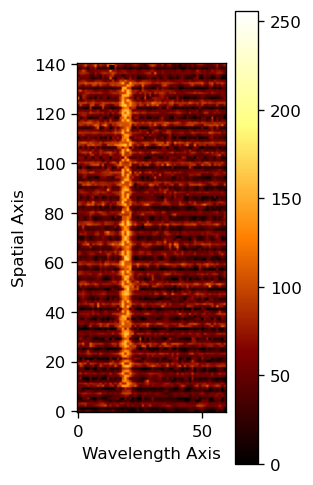

In [5]:
b = np.delete(a, np.s_[180:], 1)
c = np.delete(b, np.s_[:120], 1)

plt.figure(figsize=(2,5))
# plt.imshow(c, aspect='auto', extent=[waverange[120], waverange[179], 364, 225], cmap='afmhot')
plt.imshow(c, cmap='afmhot')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.gca().invert_yaxis()
plt.colorbar()

In [6]:
b = np.delete(a, np.s_[180:], 1)
c = np.delete(b, np.s_[:120], 1)
c = normalize(c)
#waveaxis = np.linspace(0, np.size(e, 1), np.size(e, 1))
waveaxis = waverange[120:180]*100000

upper_skyline = 131
lower_skyline = 6

sky1_a1 = np.zeros(upper_skyline - lower_skyline)

for i in range(lower_skyline, upper_skyline):           
    if i >= lower_skyline and i < upper_skyline:
        # create lmfit model with defined gaussian
        sky1_model = Model(gaussian_fit)

        # create parameters and add initial guess
        sky1_params = sky1_model.make_params()
        sky1_params.add('a0', value=0.5)
        sky1_params.add('a1', value=212324)
        sky1_params.add('a2', value=5)
        sky1_params.add('a3', value=0.3)
        sky1_params.add('a4', value=0)
        sky1_params.add('a5', value=0)
    
        try:
            sky1_fit_result = sky1_model.fit(c[i], sky1_params, x=waveaxis)
        except:
            print('Error occured at i=' + str(i))
            #print(sky1_fit_result.fit_report())
            plt.figure()
            plt.title('i='+str(i))
            plt.plot(waveaxis, c[i])
            plt.plot(waveaxis, sky1_fit_result.best_fit, 'r-', label='best fit')
            
        sky1_a1[i-lower_skyline] = sky1_fit_result.params['a1'].value
sky1_a1 = sky1_a1/100000

[[Model]]
    Model(constant)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2
    # data points      = 125
    # variables        = 1
    chi-square         = 2.9442e-08
    reduced chi-square = 2.3744e-10
    Akaike info crit   = -2769.14339
    Bayesian info crit = -2766.31507
[[Variables]]
    c:  2.12324889 +/- 1.3782e-06 (0.00%) (init = 2.123249)


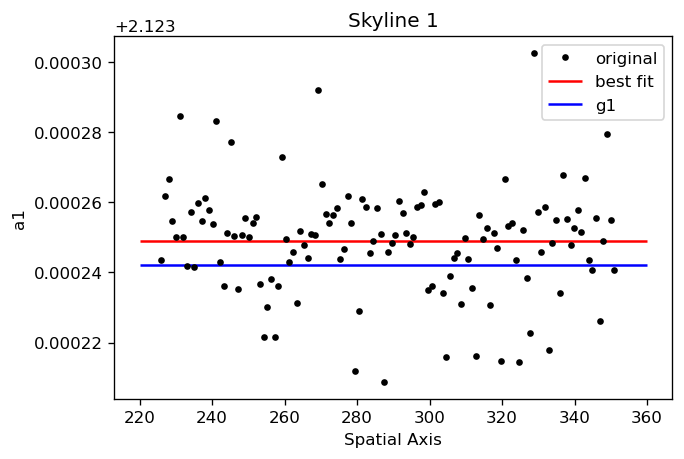

In [7]:
sky1_spat = np.linspace(lower_skyline, upper_skyline, len(sky1_a1))+220

x = sky1_spat
y = sky1_a1

mod = ConstantModel()

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.25))

sky1_spat_all = np.linspace(spat_lower, spat_upper, 140)
# sky1_slope = out.params['slope'].value
# sky1_intercept = out.params['intercept'].value
sky1_c = out.params['c'].value
sky1_a1_best_fit = sky1_c

plt.plot(x, y, '.k', label = 'original')
plt.hlines(sky1_a1_best_fit, xmin=sky1_spat_all[0], xmax=sky1_spat_all[-1], color='r', label='best fit')
plt.hlines(g1_result.params['a1'].value, xmin=sky1_spat_all[0], xmax=sky1_spat_all[-1], color='b', label='g1')
plt.title('Skyline 1')
plt.xlabel('Spatial Axis')
plt.ylabel('a1')
plt.legend()

In [8]:
sky1_a1_offset = sky1_a1_best_fit - g1_result.params['a1'].value
sky1_a1_offset 

6.87956233225151e-06

In [9]:
d = np.delete(a, np.s_[230:], 1)
e = np.delete(d, np.s_[:190], 1)
e = normalize(e)
#waveaxis = np.linspace(0, np.size(e, 1), np.size(e, 1))
waveaxis = waverange[190:230]*100000

upper_skyline = 133
lower_skyline = 8

sky2_a1 = np.zeros(upper_skyline - lower_skyline)

for i in range(lower_skyline, upper_skyline):          
    if i >= lower_skyline and i < upper_skyline:
        # create lmfit model with defined gaussian
        sky2_model = Model(gaussian_fit)

        # create parameters and add initial guess
        sky2_params = sky2_model.make_params()
        sky2_params.add('a0', value=0.6)
        sky2_params.add('a1', value=212496)
        sky2_params.add('a2', value=2)
        sky2_params.add('a3', value=0.3)
        sky2_params.add('a4', value=0)
        sky2_params.add('a5', value=0)
    
        try:
            sky2_fit_result = sky2_model.fit(e[i], sky2_params, x=waveaxis)
        except:
            print('Error occured at i=' + str(i))
            #print(sky2_fit_result.fit_report())
            plt.figure()
            plt.title('i='+str(i))
            plt.plot(waveaxis, e[i])
            plt.plot(waveaxis, sky2_fit_result.best_fit, 'r-', label='best fit')
            
        sky2_a1[i-lower_skyline] = sky2_fit_result.params['a1'].value
sky2_a1 = sky2_a1/100000

[[Model]]
    Model(constant)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2
    # data points      = 125
    # variables        = 1
    chi-square         = 5.2329e-09
    reduced chi-square = 4.2201e-11
    Akaike info crit   = -2985.07609
    Bayesian info crit = -2982.24778
[[Variables]]
    c:  2.12496076 +/- 5.8104e-07 (0.00%) (init = 2.124961)


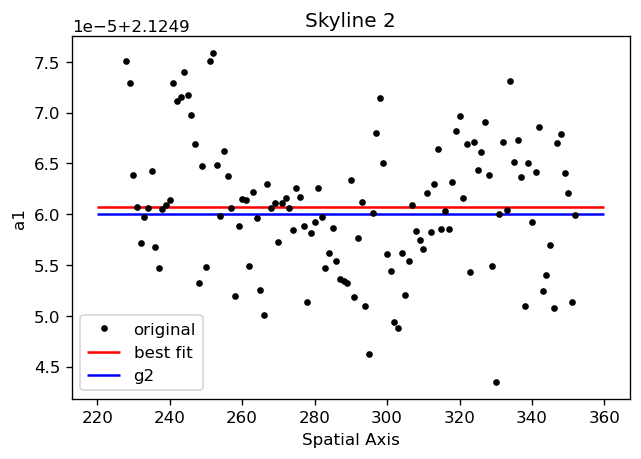

In [10]:
sky2_spat = np.linspace(lower_skyline, upper_skyline-1, len(sky2_a1))+220

x = sky2_spat
y = sky2_a1

mod = ConstantModel()

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.25))

sky2_spat_all = np.linspace(spat_lower, spat_upper, 140)
# sky1_slope = out.params['slope'].value
# sky1_intercept = out.params['intercept'].value
sky2_c = out.params['c'].value
sky2_a1_best_fit = sky2_c


plt.figure()
plt.plot(sky2_spat, sky2_a1,'.k', label = 'original')
plt.hlines(sky2_a1_best_fit, xmin=sky2_spat_all[0], xmax=sky2_spat_all[-1], color='r', label='best fit')
plt.hlines(g2_result.params['a1'].value, xmin=sky2_spat_all[0], xmax=sky2_spat_all[-1], color='b', label='g2')
plt.title('Skyline 2')
plt.xlabel('Spatial Axis')
plt.ylabel('a1')
# plt.ticklabel_format(useOffset=False)
plt.legend()

In [11]:
sky2_a1_offset = sky2_a1_best_fit - g2_result.params['a1'].value
sky2_a1_offset 

7.616494666073947e-07

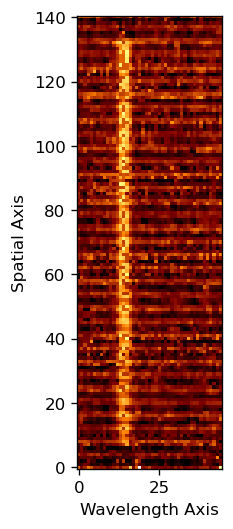

In [12]:
f = np.delete(a, np.s_[480:], 1)
g = np.delete(f, np.s_[:445], 1)

plt.figure(figsize=(2,5))
# plt.imshow(g, aspect='auto', extent=[waverange[445], waverange[480], 364, 225], cmap='afmhot')
plt.imshow(g, cmap='afmhot')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.ticklabel_format(useOffset=False)
plt.gca().invert_yaxis()

In [13]:
f = np.delete(a, np.s_[480:], 1)
g = np.delete(f, np.s_[:445], 1)
#waveaxis = np.linspace(0, np.size(g, 1), np.size(g, 1))
waveaxis = waverange[445:480]*100000

upper_skyline = 133
lower_skyline = 8

sky3_a1 = np.zeros(upper_skyline - lower_skyline)

for i in range(lower_skyline, upper_skyline):            
    if i >= lower_skyline and i < upper_skyline:
        # create lmfit model with defined gaussian
        sky3_model = Model(gaussian_fit)

        # create parameters and add initial guess
        sky3_params = sky3_model.make_params()
        sky3_params.add('a0', value=0.7)
        sky3_params.add('a1', value=213256)
        sky3_params.add('a2', value=3)
        sky3_params.add('a3', value=0.2)
        sky3_params.add('a4', value=0)
        sky3_params.add('a5', value=0)
    
        try:
            sky3_fit_result = sky3_model.fit(normalize(g[i]), sky3_params, x=waveaxis)
        except:
            print('Error occured at i=' + str(i))
            #print(sky3_fit_result.fit_report())
            plt.figure()
            plt.title('i='+str(i))
            plt.plot(waveaxis, normalize(g[i]))
            plt.plot(waveaxis, sky3_fit_result.best_fit, 'r-', label='best fit')
        
        sky3_a1[i-lower_skyline] = sky3_fit_result.params['a1'].value
        
sky3_a1 = sky3_a1/100000

[[Model]]
    Model(constant)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2
    # data points      = 125
    # variables        = 1
    chi-square         = 4.1007e-08
    reduced chi-square = 3.3070e-10
    Akaike info crit   = -2727.72922
    Bayesian info crit = -2724.90091
[[Variables]]
    c:  2.13255017 +/- 1.6265e-06 (0.00%) (init = 2.13255)


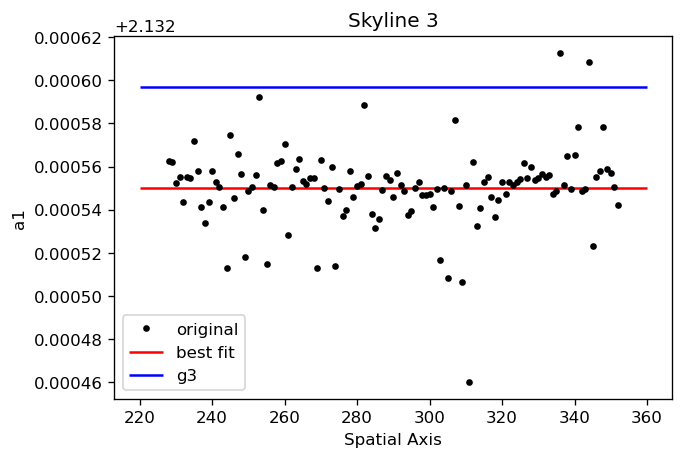

In [14]:
sky3_spat = np.linspace(lower_skyline, upper_skyline-1, len(sky3_a1))+220

x = sky3_spat
y = sky3_a1

mod = ConstantModel()

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.25))

sky3_spat_all = np.linspace(spat_lower, spat_upper, 140)
sky3_c = out.params['c'].value
sky3_a1_best_fit = sky3_c

plt.plot(x, y, '.k', label = 'original')
plt.hlines(sky3_a1_best_fit, xmin=sky3_spat_all[0], xmax=sky3_spat_all[-1], color='r', label='best fit')
plt.hlines(g3_result.params['a1'].value, xmin=sky3_spat_all[0], xmax=sky3_spat_all[-1], color='b', label='g3')
plt.title('Skyline 3')
plt.xlabel('Spatial Axis')
plt.ylabel('a1')
plt.legend(loc='lower left')

In [15]:
sky3_a1_offset = sky3_a1_best_fit - g3_result.params['a1'].value
sky3_a1_offset

-4.6823072529011966e-05

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 1024
    # variables        = 2
    chi-square         = 4.8220e-12
    reduced chi-square = 4.7182e-15
    Akaike info crit   = -33777.0481
    Bayesian info crit = -33767.1851
[[Variables]]
    slope:      2.9080e-05 +/- 7.2615e-12 (0.00%) (init = 2.908e-05)
    intercept:  2.11920261 +/- 4.2899e-09 (0.00%) (init = 2.119203)
[[Correlations]] (unreported correlations are < 0.250)
    C(slope, intercept) = -0.866


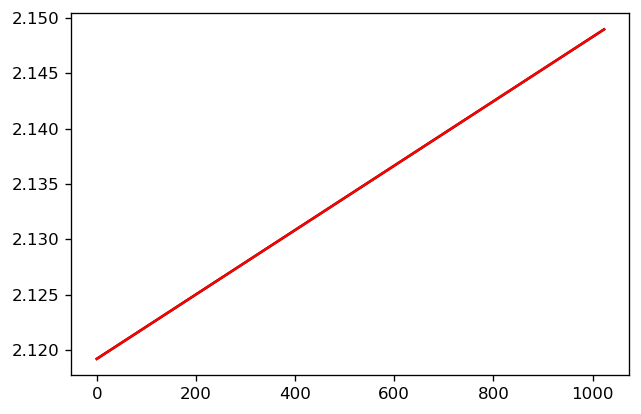

In [16]:
waveaxis = np.linspace(0, 1023, 1024)

mod = LinearModel()

pars = mod.guess(waverange, x=waveaxis)
out = mod.fit(waverange, pars, x=waveaxis)

print(out.fit_report(min_correl=0.25))

slope = out.params['slope'].value
intercept = out.params['intercept'].value

wave_best_fit = slope*waveaxis + intercept

plt.figure()
plt.plot(waveaxis, waverange,'k', label = 'original')
plt.plot(waveaxis, wave_best_fit, 'r', label = 'best fit')